
# Sai Sri Dachepalli

Twitter accounts used:
- Amitabh Bachchan - @SrBachchan
- Dhoni - @msdhoni
- Salman Khan - @BeingSalmanKhan


In [1]:
# Getting information from Twitter and saving it in Pickle Files.
import tweepy
import pickle
from twitter_keys import consumer_key,consumer_secret,access_token,access_secret

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth)

public_tweets_bachchan = api.user_timeline('@SrBachchan')
with open('Amitabh_Bachchan.pkl','wb') as f:
    pickle.dump(public_tweets_bachchan,f) 

public_tweets_dhoni = api.user_timeline('@msdhoni')
with open('Dhoni.pkl','wb') as f:
    pickle.dump(public_tweets_dhoni,f) 

public_tweets_salman = api.user_timeline('@BeingSalmanKhan')
with open('Salman_Khan.pkl','wb') as f:
    pickle.dump(public_tweets_salman,f) 


In [2]:
# Loading information from the Pickle Files

with open('Amitabh_Bachchan.pkl', 'rb') as f:
    public_tweets_bachchan = pickle.load(f) 
    
with open('Dhoni.pkl', 'rb') as f:
    public_tweets_dhoni = pickle.load(f)   
    
with open('Salman_Khan.pkl', 'rb') as f:
    public_tweets_salman = pickle.load(f)

    

# Commonly Used Device/Client

In [3]:
import collections
def most_common(devices):
    counter = collections.Counter(devices)
    return counter

In [4]:
#Finding the Source of the Tweets

bachchan_devices = []
for tweet in public_tweets_bachchan:
    bachchan_devices.append(tweet.source)
print()   
print("Devices Used by Bachchan")
print(bachchan_devices)
print()

dhoni_devices = []
for tweet in public_tweets_dhoni:
    dhoni_devices.append(tweet.source)
print()   
print("Devices Used by Dhoni")
print(dhoni_devices)
print()

salman_devices = []
for tweet in public_tweets_salman:
    salman_devices.append(tweet.source)
print()   
print("Devices Used by Salman")
print(salman_devices)
print()

print("Devices Used by Bachchan",(most_common(bachchan_devices)))
print("Devices Used by Dhoni",(most_common(dhoni_devices)))
print("Devices Used by Salman",(most_common(salman_devices)))





Devices Used by Bachchan
['Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client', 'Twitter Web Client']


Devices Used by Dhoni
['Instagram', 'Instagram', 'Instagram', 'Instagram', 'Instagram', 'Instagram', 'Instagram', 'Instagram', 'Twitter for iPhone', 'Instagram', 'Instagram', 'Instagram', 'Instagram', 'Instagram', 'Instagram', 'Twitter for iPhone', 'Instagram', 'Instagram', 'Instagram', 'Instagram']


Devices Used by Salman
['Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone', 'Twitt

From the above cell, we can see that, Twitter Web Client, and Twitter for iphone are the devices mostly used.

# Sentiment Analysis

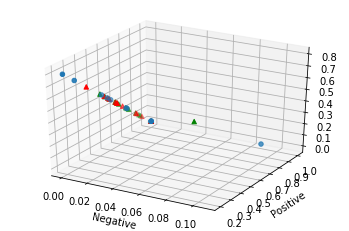

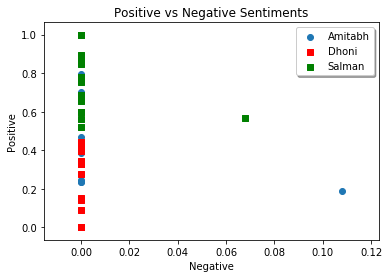

In [11]:

from nltk_helpers import get_sentiments
from nltk_helpers import split_sentiments
#Plotting 3d graph
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#build our figure
fig_a = plt.figure()
# build the axes
ax = fig_a.add_subplot(111, projection='3d')

sentiments = [get_sentiments(tweet.text) for tweet in public_tweets_bachchan]

# build our xs, ys, and zs
xs = []
for sent in sentiments:
    xs.append(sent['neg'])

ys = [sent['neu'] for sent in sentiments]
zs = list(map(lambda x: x['pos'], sentiments))

ax.scatter(xs, ys, zs)

#add another set of data
#nx.add_subplot(ax)

dhoniX, dhoniY, dhoniZ = split_sentiments([get_sentiments(tweet.text) for tweet in public_tweets_dhoni])
ax.scatter(dhoniX, dhoniY, dhoniZ, color='r', marker='^')

salmanX, salmanY, salmanZ = split_sentiments([get_sentiments(tweet.text) for tweet in public_tweets_salman])
ax.scatter(salmanX, salmanY, salmanZ, color='g', marker='^')

ax.set_xlabel('Negative')
ax.set_ylabel('Neutral')
ax.set_ylabel('Positive')

print()
plt.show()
print()


plt.scatter(xs, zs, label='Amitabh')
plt.scatter(dhoniX, dhoniZ,color='r', marker='s', label='Dhoni')
plt.scatter(salmanX, salmanY,color='g', marker='s', label='Salman')

plt.xlabel('Negative')
plt.ylabel('Positive')
plt.title('Positive vs Negative Sentiments')
plt.legend(loc='upper right', shadow=True)

plt.show()



From the above graphs, we can analyze that Dhoni and Salman did not have much negative tweets where as Amitabh has . But, on the whole, we can say that, most of their comments are all positive.

# Avergare number of Words

In [12]:
def word_length(text):
    tokens = text.lower().split()
    return len(tokens)

def calc_avg(words):
    return sum(words)/len(words)

In [14]:
AmitabhWordsLength = []
for tweet in public_tweets_bachchan:
    AmitabhWordsLength.append(word_length(tweet.text))
    
DhioniWordsLength = []
for tweet in public_tweets_dhoni:
    DhioniWordsLength.append(word_length(tweet.text))
    
SalmanWordsLength = []
for tweet in public_tweets_salman:
    SalmanWordsLength.append(word_length(tweet.text))

avg = {'Amitabh Tweets':calc_avg(AmitabhWordsLength),'Dhoni Tweets':calc_avg(DhioniWordsLength),'Salman Tweets':calc_avg(SalmanWordsLength)}

print(avg)

{'Amitabh Tweets': 16.5, 'Dhoni Tweets': 11.55, 'Salman Tweets': 14.15}


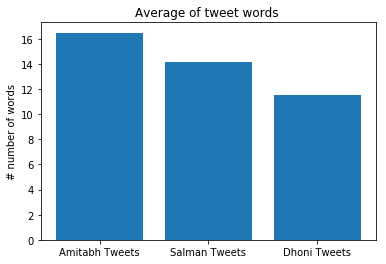

In [15]:
import matplotlib.pyplot as plt
heights = list(avg.values())
heights.sort(reverse=True)
plt.bar(range(len(heights)),heights)
plt.title('Average of tweet words ')
plt.ylabel('# number of words')
keys = list(avg.keys())
keys.sort(reverse=True, key=lambda x: avg[x])
plt.xticks(range(len(keys)),keys)
plt.show()

From the above result, we can conclude taht Amitabh uses more words compared to Salman and Dhoni. And Dhoni uses less words among all